In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.date, Measurement.tobs).filter((extract('month', Measurement.date)==6)).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter((extract('month', Measurement.date)==6)).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter((extract('month', Measurement.date)==12)).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [9]:
# 7. Convert the December temperatures to a list.
result_list = session.query(Measurement.date, Measurement.tobs).filter((extract('month', Measurement.date)==12)).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df1 = pd.DataFrame(result_list, columns=['date','December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df1.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Addiotnal Queries to perform to gather more weather data for June and December

### Calculate year wise June and December month data

In [12]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
        
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [13]:
# This function is to display data for 7 years
def displayMoreInfo(month):
    year=['2010', '2011', '2012', '2013', '2014', '2015', '2016']

    print('\033[1m' + 'Year   Min    Avg       Max ' + '\033[0m')
    print('-----------------------------')
    for yr in year:
        start_date = yr + '-' + month + '-01'
        end_date = yr + '-' + month + '-30'


        result = calc_temps(start_date, end_date) #Calling temperature fetch for date range
        print(f'{yr}   {result[0][0]}   {np.round(result[0][1],2)}     {result[0][2]} ')

In [14]:
# Calling display function
print('\033[1m' + 'June Temperatures for 7 years' + '\033[0m')
print(' ')
displayMoreInfo('06')


June Temperatures for 7 years
 
Year   Min    Avg       Max 
-----------------------------
2010   67.0   74.93     85.0 
2011   65.0   73.94     82.0 
2012   68.0   74.0     81.0 
2013   66.0   74.6     81.0 
2014   67.0   75.03     84.0 
2015   66.0   74.99     81.0 
2016   64.0   75.18     81.0 


In [15]:
# Calling display function
print('\033[1m' + 'December Temperatures for 7 years' + '\033[0m')
print(' ')
displayMoreInfo('12')


December Temperatures for 7 years
 
Year   Min    Avg       Max 
-----------------------------
2010   58.0   70.09     80.0 
2011   65.0   70.96     77.0 
2012   61.0   71.29     80.0 
2013   63.0   71.13     83.0 
2014   57.0   70.15     81.0 
2015   65.0   73.5     82.0 
2016   60.0   71.21     78.0 


### Calculate Station wise June and December month data for each Year

In [16]:
# This function called `calc_temps_StationWise` will accept start date and end date STATION WISE in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps_StationWise(start_date, end_date):
    return session.query(Measurement.station, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).\
                filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    

In [17]:
# This function is to display data for 7 years
def displayMoreInfoStationWise(month):
    
    year=['2010', '2011', '2012', '2013', '2014', '2015', '2016']

    print('\033[1m' + 'StationID     Min       Avg       Max ' + '\033[0m')
    print('---------------------------------------')
    for yr in year:
        start_date = yr + '-' + month + '-01'
        end_date = yr + '-' + month + '-30'
        print('\033[1m' + f'------------Year-{yr}------------------' + '\033[0m')
        print("   ")
        resultList = calc_temps_StationWise(start_date, end_date)
        
        for result in resultList:
            
            print(f'{result[0]}   {result[1]}      {np.round(result[2],2)}     {result[3]}')
        print("  ")


In [18]:
# Calling display function
print('\033[1m' + 'June Temperaturesfor different stations' + '\033[0m')
print(' ')
displayMoreInfoStationWise('06')


June Temperaturesfor different stations
 
StationID     Min       Avg       Max 
---------------------------------------
------------Year-2010------------------
   
USC00519397   76.0      77.77     82.0
USC00519281   69.0      73.63     81.0
USC00513117   70.0      74.8     83.0
USC00519523   73.0      76.17     79.0
USC00514830   70.0      73.69     76.0
USC00511918   69.0      75.62     85.0
USC00518838   67.0      72.57     78.0
USC00516128   68.0      72.86     79.0
USC00517948   73.0      76.75     79.0
  
------------Year-2011------------------
   
USC00519523   71.0      75.0     79.0
USC00516128   66.0      70.73     74.0
USC00513117   69.0      73.47     76.0
USC00511918   68.0      73.43     80.0
USC00519397   70.0      76.54     78.0
USC00519281   67.0      74.62     82.0
USC00514830   67.0      72.58     76.0
USC00517948   65.0      75.19     77.0
USC00518838   73.0      75.4     78.0
  
------------Year-2012------------------
   
USC00519523   72.0      75.4     81.0
USC0

In [19]:
# Calling display function
print('\033[1m' + 'December Temperaturesfor different stations' + '\033[0m')
print(' ')
displayMoreInfoStationWise('12')

December Temperaturesfor different stations
 
StationID     Min       Avg       Max 
---------------------------------------
------------Year-2010------------------
   
USC00519523   61.0      71.7     78.0
USC00519281   58.0      68.73     76.0
USC00516128   61.0      69.3     80.0
USC00513117   64.0      70.87     78.0
USC00511918   63.0      69.8     77.0
USC00514830   62.0      69.03     73.0
USC00519397   64.0      70.58     77.0
USC00518838   63.0      72.23     78.0
USC00517948   66.0      69.5     76.0
  
------------Year-2011------------------
   
USC00519523   69.0      72.47     75.0
USC00519397   68.0      72.17     77.0
USC00519281   65.0      70.23     75.0
USC00513117   68.0      71.23     74.0
USC00511918   65.0      70.67     77.0
USC00516128   65.0      69.24     73.0
USC00514830   66.0      70.64     74.0
USC00517948   69.0      70.92     76.0
  
------------Year-2012------------------
   
USC00519523   65.0      73.7     78.0
USC00519281   62.0      70.27     76.0
U

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station,  latitude, longitude, and elevation
from sqlalchemy import and_,desc

#Starting from the last data point in the database. 
end_year = dt.date(2017, 8, 7)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 1) - dt.timedelta(days=365)

rainfall_data = session.query(func.sum(Measurement.prcp), Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation )\
                .filter(Measurement.station == Station.station)\
                .filter(and_(Measurement.date >= prev_year, Measurement.date <= end_year))\
                .group_by(Measurement.station).order_by(desc(func.sum(Measurement.prcp)))
rainfall_df = pd.DataFrame(rainfall_data, columns= ['total_rain', 'station', 'name', 'lat', 'lng','elevation'])
rainfall_df



2016-08-01


,total_rain,station,name,lat,lng,elevation
0,158.27,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,79.55,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,54.39,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,39.80,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,34.36,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,17.22,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,4.77,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


<AxesSubplot:>

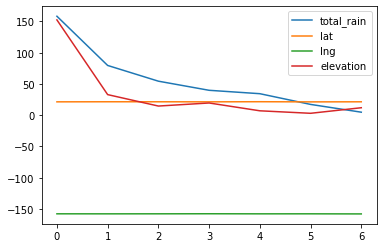

In [44]:


rainfall_df.plot()